In [73]:
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(1)
def adjacency_matrix_to_edges(G_graphml):
    matrix = nx.adjacency_matrix(nx.read_graphml(G_graphml)).todense()
    edges = []
    n = len(matrix)  # assuming matrix is square
    for u in range(n):
        for v in range(u, n):
            if matrix[u][v] != 0:  # assuming 0 means no edge
                edges.append((u, v, matrix[u][v]))
    return edges, n, len(edges)

G = 'graphs/0004_500.graphml'
edges, n_nodes, m = adjacency_matrix_to_edges(G)

G = nx.read_graphml("graphs/0004_500.graphml")

In [74]:

def max_weight_cut(edges, n_nodes, solutions=1):

    best_solution = None
    best_cut_weight = 0
    seen_solutions = set()

    for _ in range(solutions):
        # Generate a random candidate solution
        partition = {node: random.choice([0, 1]) for node in range(n_nodes)}

        if len(seen_solutions) == 2**(n_nodes): # max possible solutions
            break

        # avoid calculating the same solution multiple times
        partition_hash = frozenset(partition.items())
        if partition_hash in seen_solutions:
            continue

        seen_solutions.add(partition_hash)
        new_cut_weight = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])
        if new_cut_weight > best_cut_weight:
            best_cut_weight = new_cut_weight
            best_solution = partition.copy()


    S = set([node for node, part in best_solution.items() if part == 0])
    T = set(range(n_nodes)) - S
    return S, T, best_cut_weight

S1, T1, best_cut_weight = max_weight_cut(edges, n_nodes)

# %%
import math

def simulated_annealing_partition(edges, n_nodes, temperature=10, cooling_rate=0.9):
    # Step 1: Extract unique nodes
    nodes = range(n_nodes)
    
    # Step 2: Initialize partitions randomly
    partition = {node: random.choice([0, 1]) for node in nodes}
    
    # Initialize current cost
    current_cut = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])

    best_partition = partition.copy()
    best_cut = current_cut
    while temperature > 1e-3:
        # Step 3: Randomly select a node to move to the opposite partition
        node = random.choice(nodes)
        partition[node] = 1 - partition[node]  # Flip partition
        
        # Calculate the new cost after swapping
        new_cut = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])
        
        # Step 4: Determine if we should accept the new solution
        cost_diff = new_cut - current_cut
        if cost_diff > 0 or random.random() < math.exp(cost_diff / temperature):
            # Accept the move
            current_cut = new_cut
            # Update the best partition if new cost is lower
            if new_cut > best_cut:
                best_cut = new_cut
                best_partition = partition.copy()
        else:
            # Reject the move (revert the change)
            partition[node] = 1 - partition[node]
        
        # Step 5: Cool down the temperature
        temperature *= cooling_rate
    
    S = set([node for node, part in best_partition.items() if part == 0])
    T = set(range(n_nodes)) - S
    return S, T, best_cut

S2, T2, best_cut = simulated_annealing_partition(edges, n_nodes)

# %%

def random_greedy(edges, n_nodes, itLim = 0.01):
    """Performs Random Greedy optimization for the Max Weight Cut problem."""

    partition = {node: random.choice([0, 1]) for node in range(n_nodes)}
    cut_weight = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])

    improved = True
    it_limit = len(edges) * itLim
    while improved and it_limit > 0:
        it_limit -= 1
        improved = False
        for node in range(n_nodes):
            # Flip the node to the other set
            partition[node] = 1 - partition[node]  
            new_cut_weight = sum(weight for node1, node2, weight in edges if partition[node1] != partition[node2])

            # If this move improves the cut weight, keep it; otherwise, revert
            if new_cut_weight > cut_weight:
                cut_weight = new_cut_weight
                improved = True  # Continue improving
                break
            else:
                partition[node] = 1 - partition[node]  # Revert the change

    S = set([node for node, part in partition.items() if part == 0])
    T = set(range(n_nodes)) - S
    return S, T, cut_weight

S3, T3, cut_weight = random_greedy(edges, n_nodes)
#S, T, cut_weight


In [75]:
plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,   

})

In [76]:
S1

{0, 1, 3}

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_11435/2293762287.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


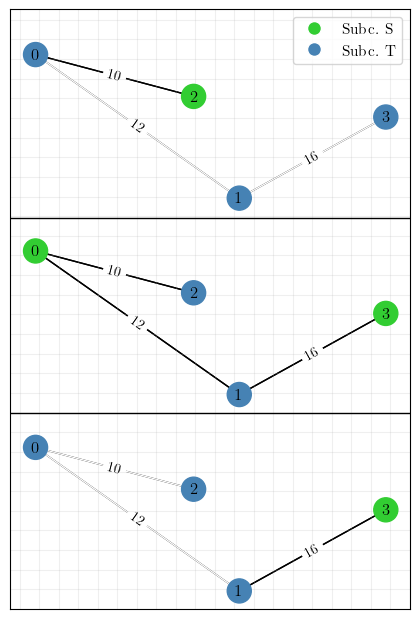

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.lines import Line2D


random.seed(259)  

plt.figure(figsize=(4, 6))
# Make the figure background transparent

# Assuming G is your graph object
space_limit = 1000  # might be important

# Assign random (x, y) positions to each node in a 1000x1000 grid
positions = {i: (random.randint(0, space_limit*2), random.randint(0, space_limit)) for i in G.nodes()}  # might be important



# Assign random colors to nodes
node_color_map = {node: "#4682B4" if int(node) in S3 else '#32CD32' for node in G.nodes()}
# Get edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')
# Create a custom list of edge colors where transparency is added if nodes have the same color
edge_colors = []
for u, v in G.edges():
    # If the two nodes have the same color, make the edge transparent (alpha = 0)
    if node_color_map[u] == node_color_map[v]:
        edge_colors.append((1, 1, 1, 0))  # White color with transparency
    else:
        edge_colors.append((0, 0, 0, 1))  # Solid black edge
# Draw the first graph (y = 0-1000)
nx.draw(G, pos=positions, with_labels=True, node_color=[node_color_map[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos=positions, edge_color=edge_colors, alpha=1.0)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_weights)


# Shift the positions for the second graph (y = 1000-2000)
shifted_positions = {node: (x, y + space_limit) for node, (x, y) in positions.items()}
node_color_map = {node: "#4682B4" if int(node) in S2 else '#32CD32' for node in G.nodes()}
edge_colors = []
for u, v in G.edges():
    # If the two nodes have the same color, make the edge transparent (alpha = 0)
    if node_color_map[u] == node_color_map[v]:
        edge_colors.append((1, 1, 1, 0))  # White color with transparency
    else:
        edge_colors.append((0, 0, 0, 1))  # Solid black edge
nx.draw(G, pos=shifted_positions, with_labels=True, node_color=[node_color_map[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos=shifted_positions, edge_color=edge_colors, alpha=1.0)
nx.draw_networkx_edge_labels(G, pos=shifted_positions, edge_labels=edge_weights)


############################################################################################################
# Shift the positions for the second graph (y = 1000-2000)
shifted_positions = {node: (x, y + space_limit*2) for node, (x, y) in positions.items()}
node_color_map = {node: "#4682B4" if int(node) in S1 else '#32CD32' for node in G.nodes()}
edge_colors = []
for u, v in G.edges():
    # If the two nodes have the same color, make the edge transparent (alpha = 0)
    if node_color_map[u] == node_color_map[v]:
        edge_colors.append((1, 1, 1, 0))  # White color with transparency
    else:
        edge_colors.append((0, 0, 0, 1))  # Solid black edge
nx.draw(G, pos=shifted_positions, with_labels=True, node_color=[node_color_map[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos=shifted_positions, edge_color=edge_colors, alpha=1.0)
nx.draw_networkx_edge_labels(G, pos=shifted_positions, edge_labels=edge_weights)

############################################################################################################

colors_scatter = ["#ff7f0e", "#1f77b4", "green", "red"]
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#32CD32', markersize=10, label='Subc. S'),  # Green
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#4682B4', markersize=10, label='Subc. T')   # Blue
]

# Add the legend to the plot
plt.legend(handles=legend_elements, loc='upper right')

plt.xticks(range(0, 3*space_limit + 1, 100))  # Set X-axis ticks from 0 to 1000, every 100 units
plt.yticks(range(0, space_limit * 3 + 1, 100))  # Set Y-axis ticks from 0 to 2000, every 100 units
plt.xlim(-50, space_limit*2)  # Set X-axis limit
plt.ylim(0, space_limit * 3+55)  # Set Y-axis limit to 0-2000

plt.axhline(y=1000, linewidth=1, color='black')
plt.axhline(y=1990, linewidth=1, color='black')

# Make sure tick labels (numbers) are visible and properly formatted
plt.tick_params(axis='both', which='both', labelsize=10)  # Set the size of tick labels
plt.gca().set_axis_on()
plt.grid(True, alpha=0.2)
plt.savefig("exampGraph.png", dpi=900, transparent=True)

plt.tight_layout()
plt.show()
